In [1]:
import ROOT
import sys
import math
import matplotlib.pyplot as plt
import seaborn as sns

Welcome to JupyROOT 6.25/01


/cvmfs/sft-nightlies.cern.ch/lcg/views/dev3/Thu/x86_64-centos7-gcc10-opt/lib/ROOT/_facade.py:150: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  return _orig_ihook(name, *args, **kwds)


In [2]:
fin = ROOT.TFile.Open("TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8/tree_25.root")
trees = fin.Get("Events")

Warning in <TClass::Init>: no dictionary for class edm::Hash<1> is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessHistory is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessConfiguration is available
Warning in <TClass::Init>: no dictionary for class edm::ParameterSetBlob is available
Warning in <TClass::Init>: no dictionary for class pair<edm::Hash<1>,edm::ParameterSetBlob> is available


In [23]:
trees = ROOT.TChain("Events")
for i in range(1,62):
    trees.Add("root://cmseos.fnal.gov//store/user/aandreas/nanopost/03Sep20v7/ST_t-channel_antitop_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8/ST_t-channel_antitop_4f_InclusiveDecays-pow-madspin_2018/200926_071219/0000/tree_{}.root".format(i))
#for i in range(1,19):
#    trees.Add("root://cmseos.fnal.gov//store/user/aandreas/nanopost/03Sep20v7/ST_t-channel_antitop_4f_inclusiveDecays_TuneCP5_13TeV-powhegV2-madspin-pythia8/ST_t-channel_antitop_4f_inclusiveDecays-powV2-madspin_2017/200925_180751/0000/tree_{}.root".format(i))

In [3]:
top_pol=[]
top_pt=[]
top_energy=[]
top_mass=[]
j1_pt=[]
j1_eta=[]
j1_phi=[]
j1_energy=[]
j2_pt=[]
j2_eta=[]
j2_phi=[]
j2_energy=[]
j3_pt=[]
j3_eta=[]
j3_phi=[]
j3_energy=[]
e_frac=[]
angle=[]
weight=[]

In [4]:
import numpy as np
import pandas as pd

In [5]:
count=0
for it,t in enumerate(trees):
    if t.nFatJet==0:
        continue
    if t.FatJet_msoftdrop[0]<105:
        continue
    ak8jet = ROOT.TLorentzVector()
    ak8jet.SetPtEtaPhiM(t.FatJet_pt[0],t.FatJet_eta[0],t.FatJet_phi[0],t.FatJet_mass[0])
    jets_tmp=[]
    jc=0
    for ix in range(0,t.nJet):
        ak4jet = ROOT.TLorentzVector()
        ak4jet.SetPtEtaPhiM(t.Jet_pt[ix],t.Jet_eta[ix],t.Jet_phi[ix],0)
        if ak8jet.DeltaR(ak4jet)<1.0 and jc<3:
            jets_tmp.append((t.Jet_btagDeepB[ix],ak4jet))
            jc+=1
    jets_tmp.sort(reverse=True)
    if jc==3 and jets_tmp[0][0]>0.1355:
        #re3.append(test.M())
        top_pt.append(ak8jet.Pt())
        top_energy.append(ak8jet.E())
        top_mass.append(t.FatJet_msoftdrop[0])
        j1_pt.append(jets_tmp[0][1].Pt())
        j1_eta.append(jets_tmp[0][1].Eta())
        j1_phi.append(jets_tmp[0][1].Phi())
        j1_energy.append(jets_tmp[0][1].E())
        j2_pt.append(jets_tmp[1][1].Pt())
        j2_eta.append(jets_tmp[1][1].Eta())
        j2_phi.append(jets_tmp[1][1].Phi())
        j2_energy.append(jets_tmp[1][1].E())
        j3_pt.append(jets_tmp[2][1].Pt())
        j3_eta.append(jets_tmp[2][1].Eta())
        j3_phi.append(jets_tmp[2][1].Phi())
        j3_energy.append(jets_tmp[2][1].E())
        e_frac.append(jets_tmp[0][1].E()/ak8jet.E())
        bst = ak8jet.BoostVector()
        if (jets_tmp[0][1]+jets_tmp[1][1]).M()<(jets_tmp[0][1]+jets_tmp[2][1]).M():
            jets_tmp[1][1].Boost(-bst)
            d_v3=jets_tmp[1][1].Vect()
        else:
            jets_tmp[2][1].Boost(-bst)
            d_v3=jets_tmp[2][1].Vect()
        t_v3=ak8jet.Vect()
        angle.append(d_v3.Dot(t_v3)/(d_v3.Mag()*t_v3.Mag()))
        top_pol.append(1)
        count+=1
    if count==5887:
        break

Warning in <TLorentzVector::Compare>: this method must be overridden!
Warning in <TLorentzVector::Compare>: this method must be overridden!
Warning in <TLorentzVector::Compare>: this method must be overridden!
Warning in <TLorentzVector::Compare>: this method must be overridden!
Warning in <TLorentzVector::Compare>: this method must be overridden!
Warning in <TLorentzVector::Compare>: this method must be overridden!
Warning in <TLorentzVector::Compare>: this method must be overridden!
Warning in <TLorentzVector::Compare>: this method must be overridden!
Warning in <TLorentzVector::Compare>: this method must be overridden!
Warning in <TLorentzVector::Compare>: this method must be overridden!
Warning in <TLorentzVector::Compare>: this method must be overridden!
Warning in <TLorentzVector::Compare>: this method must be overridden!
Warning in <TLorentzVector::Compare>: this method must be overridden!
Warning in <TLorentzVector::Compare>: this method must be overridden!
Warning in <TLorentz

In [6]:
print (count)

5887


In [7]:
dict_var = {'top_pt':top_pt, 'top_energy':top_energy, 'top_mass':top_mass, 'j1_pt':j1_pt, 'j1_eta':j1_eta, 'j1_phi':j1_phi, \
        'j1_energy':j1_energy, 'j2_pt':j2_pt, 'j2_eta':j2_eta,  'j2_phi':j2_phi,'j2_energy':j2_energy, 'j3_pt':j3_pt, 'j3_eta':j3_eta, 'j3_phi':j3_phi,'j3_energy':j3_energy,\
        'e_frac':e_frac, 'angle':angle, 'top_pol':top_pol} 

In [8]:
df=pd.DataFrame(dict_var)

In [9]:
df.shape

(5887, 18)

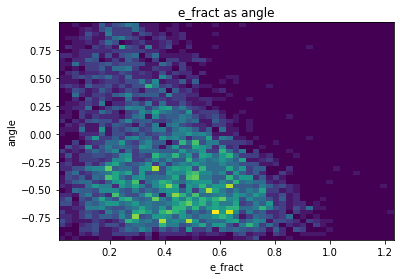

In [10]:
plt.hist2d(dict_var['e_frac'],dict_var['angle'],bins=50)
#plt.xlim([0, 1])
#plt.ylim([-1, 1])
plt.title("e_fract as angle")
plt.xlabel("e_fract")
plt.ylabel("angle")
plt.show()

In [40]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [66]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=50, seed=123)
xg_cl.fit(X_train,y_train)
preds = xg_cl.predict(X_test)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]

In [67]:
print("accuracy: %f" % (accuracy))

accuracy: 0.701911


In [68]:
from sklearn.metrics import roc_curve

In [69]:
pre_pro=xg_cl.predict_proba(X_test)
pre_pro=pre_pro[:, 1]
pl_fpr, pl_tpr, _ = roc_curve(y_test, pre_pro)

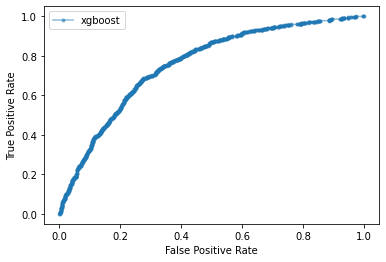

In [70]:
plt.plot(pl_fpr, pl_tpr, marker='.', label='xgboost',alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

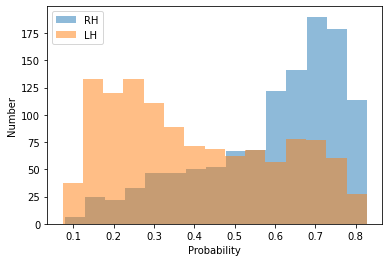

In [71]:
pre_pro=xg_cl.predict_proba(X_test)[:, 1]
plt.hist(pre_pro[y_test==1],bins=15,alpha=0.5,label='RH')
plt.hist(pre_pro[y_test==0],bins=15,alpha=0.5,label='LH')
plt.xlabel('Probability')
plt.ylabel('Number')
plt.legend()
plt.show()

In [179]:
print (y_test)

730     1
7914    0
7303    0
5217    1
1953    1
       ..
7642    0
8697    0
2693    1
1877    1
1364    1
Name: top_pol, Length: 2355, dtype: int64


In [21]:
df.head()

,top_pt,top_energy,top_mass,j1_pt,j1_eta,j1_phi,j1_energy,j2_pt,j2_eta,j2_phi,j2_energy,j3_pt,j3_eta,j3_phi,j3_energy,e_frac,angle,top_pol
0,539.00,597.658917,196.7500,106.8125,0.441711,1.734863,117.403065,340.50000,0.154877,1.090088,344.591921,104.6875,0.581543,0.837280,122.894304,0.196438,-0.131719,0
1,563.50,751.761367,119.4375,211.7500,0.993286,-1.986328,325.083938,31.96875,-0.027172,-2.335938,31.980552,315.7500,0.603149,-2.185059,374.945606,0.432430,-0.874706,0
2,470.50,678.293254,162.6250,309.2500,0.927734,-1.627441,452.157837,54.12500,0.929199,-1.136475,79.221415,105.6875,0.467529,-1.997559,117.450219,0.666611,-0.417553,0
3,404.25,606.550488,183.8750,242.7500,-0.884644,0.015873,344.095964,16.93750,-0.800537,-1.140381,22.660887,168.5000,-0.812256,-0.681274,227.208798,0.567300,-0.608880,0
4,355.00,417.620799,156.6250,114.6250,-0.000063,-1.548340,114.625000,69.31250,-0.323547,-2.391113,72.972176,178.8750,-0.638428,-1.852539,216.583958,0.274471,-0.279413,0


In [22]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11774 entries, 0 to 11773
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   top_pt      11774 non-null  float64
 1   top_energy  11774 non-null  float64
 2   top_mass    11774 non-null  float64
 3   j1_pt       11774 non-null  float64
 4   j1_eta      11774 non-null  float64
 5   j1_phi      11774 non-null  float64
 6   j1_energy   11774 non-null  float64
 7   j2_pt       11774 non-null  float64
 8   j2_eta      11774 non-null  float64
 9   j2_phi      11774 non-null  float64
 10  j2_energy   11774 non-null  float64
 11  j3_pt       11774 non-null  float64
 12  j3_eta      11774 non-null  float64
 13  j3_phi      11774 non-null  float64
 14  j3_energy   11774 non-null  float64
 15  e_frac      11774 non-null  float64
 16  angle       11774 non-null  float64
 17  top_pol     11774 non-null  int64  
dtypes: float64(17), int64(1)
memory usage: 1.6 MB
None
